### Please enter State name in below cell

In [68]:
State_name = "California"


### Generate results

In [71]:
# %run ../PythonScripts/prevalence_ww.py  ### uncomment this cell and run if you want to generate visuals for updated results from 
# prevalance_ww file

### Generate Visualizations

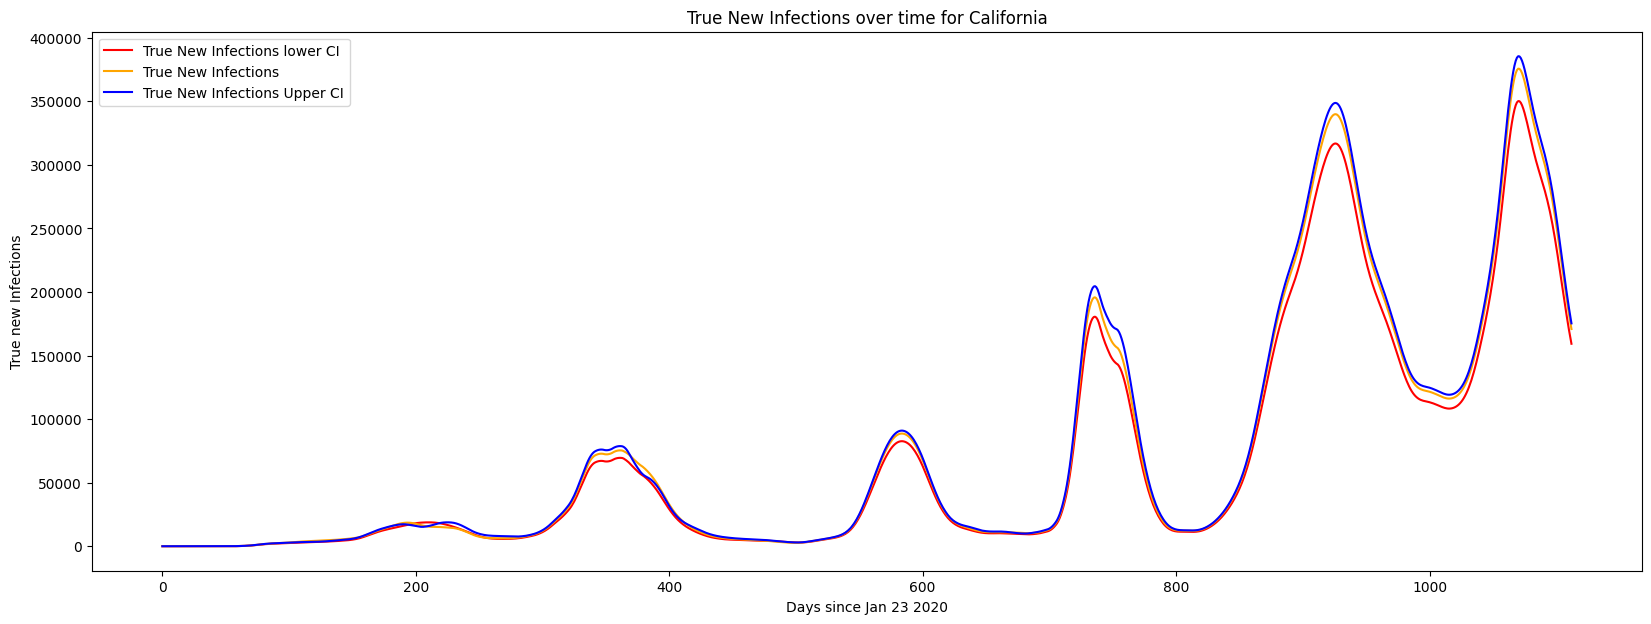

In [70]:

abvs = pd.read_csv('../Static_Files/us_states_list.txt', header=None)

state_map = abvs.to_dict()[0]


state_index_map = {}

for key,value in state_map.items():
    state_index_map[value] = key

import pickle 
with open("../Output_Pickles/true_new_infec_ww.pkl", "rb") as f:
    true_new_infec_ww = pickle.load(f)
with open("../Output_Pickles/true_new_infec_final.pkl", "rb") as f:
    true_new_infec = pickle.load(f)


get_index = state_index_map.get(State_name,None)
 
if get_index is None:
    print("Please use correct state name")


xs = list(range(0,true_new_infec_ww[0].shape[1]))

ys_0 = true_new_infec_ww[0][get_index]
ys_1 = true_new_infec_ww[1][get_index]
ys_2 = true_new_infec_ww[2][get_index]


import matplotlib.pyplot as plt
plt.plot(xs,ys_0, color='red', label='True New Infections lower CI')
plt.plot(xs,ys_1, color='orange', label='True New Infections')
plt.plot(xs,ys_2, color='blue', label='True New Infections Upper CI')
plt.rcParams["figure.figsize"] = (20,7)
plt.legend()
plt.title("True New Infections over time for "+State_name)
plt.xlabel("Days since Jan 23 2020")
plt.ylabel("True new Infections")

plt.show()